# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the training data
train = pd.read_csv("..\dataset\train.csv")
test = pd.read_csv("..\dataset\test.csv")
train.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,101,322,107,3,3.5,3.5,8.46,1,0.71
1,102,312,105,2,2.5,3.0,8.12,0,0.64
2,103,314,106,2,4.0,3.5,8.25,0,0.62
3,104,317,104,2,4.5,4.0,8.47,0,0.57
4,105,326,112,3,3.5,3.0,9.05,1,0.74


In [4]:
# Quick correlation heatmap
cm = sns.light_palette("red", as_cmap=True)
corr_heat = train.corr().style.background_gradient(cmap=cm)
corr_heat

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1,-0.0911283,-0.169658,-0.0620891,-0.128411,-0.0395839,-0.167232,0.0396028,-0.139572
GRE Score,-0.0911283,1,0.808203,0.600429,0.637423,0.493723,0.840407,0.605398,0.840951
TOEFL Score,-0.169658,0.808203,1,0.63208,0.66382,0.532009,0.815571,0.488895,0.821591
University Rating,-0.0620891,0.600429,0.63208,1,0.740721,0.594156,0.679962,0.441933,0.678058
SOP,-0.128411,0.637423,0.66382,0.740721,1,0.684824,0.741772,0.437314,0.743815
LOR,-0.0395839,0.493723,0.532009,0.594156,0.684824,1,0.607632,0.362447,0.621762
CGPA,-0.167232,0.840407,0.815571,0.679962,0.741772,0.607632,1,0.542116,0.908947
Research,0.0396028,0.605398,0.488895,0.441933,0.437314,0.362447,0.542116,1,0.59221
Chance of Admit,-0.139572,0.840951,0.821591,0.678058,0.743815,0.621762,0.908947,0.59221,1


In [5]:
print("The Highest Correlating features with Chance of Admit are :")
train.corr()["Chance of Admit "].sort_values(ascending=False)[1:][:-1]

The Highest Correlating features with Chance of Admit are :


CGPA                 0.908947
GRE Score            0.840951
TOEFL Score          0.821591
SOP                  0.743815
University Rating    0.678058
LOR                  0.621762
Research             0.592210
Name: Chance of Admit , dtype: float64

In [6]:
# Check the cardinality of the features
def check_cardinality(dataframe):
    for c in list(dataframe.columns):
        print("Column Name :", c)
        print(dataframe[c].value_counts().count())
    return check_cardinality

check_cardinality(train)

Column Name : Serial No.
400
Column Name : GRE Score
49
Column Name : TOEFL Score
28
Column Name : University Rating
5
Column Name : SOP
9
Column Name : LOR 
9
Column Name : CGPA
159
Column Name : Research
2
Column Name : Chance of Admit 
57


<function __main__.check_cardinality(dataframe)>

- GRE Score, TOEFL Score have high cardinalities
- CGPA has very high cardinalities
- Research is binary

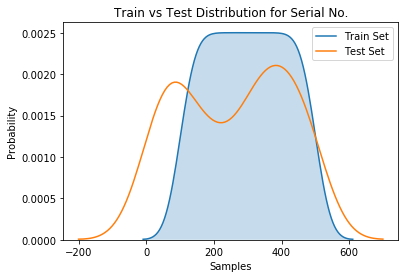

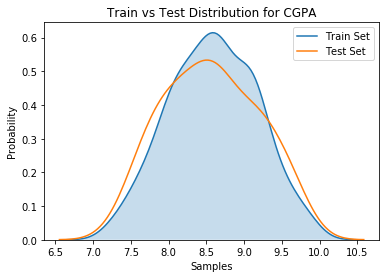

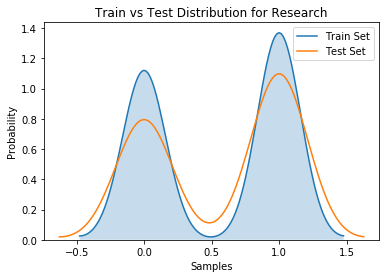

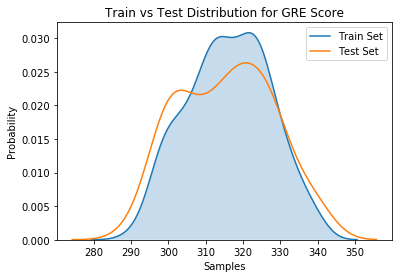

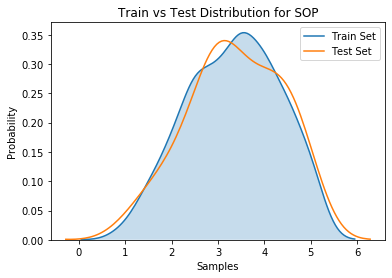

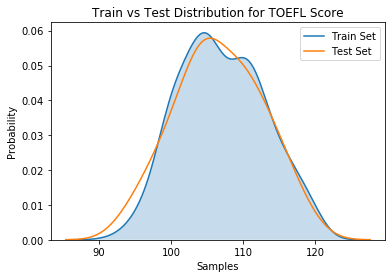

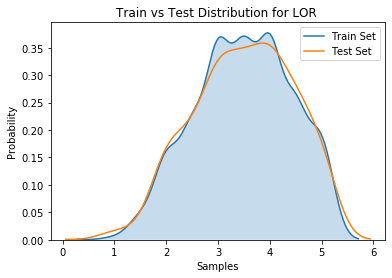

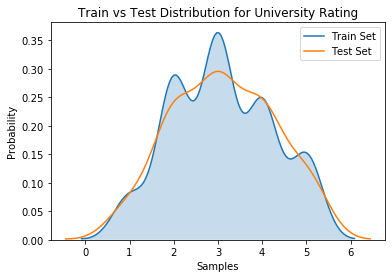

In [8]:
def train_test_dist(train, test, shade_train=False, shade_test=False):
    cols = list(set(train.columns).intersection(set(test.columns)))
    for c in cols:
        sns.kdeplot(train[c], label="Train Set", shade=shade_train)
        sns.kdeplot(test[c], label="Test Set", shade=shade_test)
        plt.title("Train vs Test Distribution for "+c)
        plt.xlabel("Samples")
        plt.ylabel("Probability")
        plt.show()
        
    return None

# call
train_test_dist(train, test, True)
    

NOTE : More further EDA can be performed to understand the data better